In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [15]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'InceptionResNetV2_lr0.00001_106words_dslr128-99.70'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [7]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [8]:
X = X.astype('float32')
X /= 255


In [9]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [10]:
del X,Y

In [11]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [12]:
# case 1: pretrained without weight ............... retraining architechture

model_name = 'InceptionResNetV2'


exec('from tensorflow.keras.applications import '+ model_name)


## case 1:
exec('MODEL = '+model_name+'(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=True, weights=None, classes = cat_len)')
for layers in MODEL.layers: 
    layers.trainable=True
    
model1=MODEL
model1.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                

 batch_normalization_10 (BatchN  (None, 13, 13, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 13, 13, 64)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 13, 13, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 batch_normalization_19 (BatchN  (None, 13, 13, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 13, 13, 48)  144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 13, 13, 32)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 13, 13, 48)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_18

                                                                                                  
 block35_3_mixed (Concatenate)  (None, 13, 13, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 13, 13, 320)  41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 13, 13, 320)  0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
                                                                                                  
 block35_3

                                                                                                  
 activation_40 (Activation)     (None, 13, 13, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 13, 13, 32)   10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 13, 13, 32)   9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 13, 13, 64)   27648       ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_36 (BatchN  (None, 13, 13, 32)  96          ['conv2d_36[0][0]']              
 ormalizat

 block35_6 (Lambda)             (None, 13, 13, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 13, 13, 320)  0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 13, 13, 32)   10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 13, 13, 32)  96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_59 (Conv2D)             (None, 13, 13, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 13, 13, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 13, 13, 32)  96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 13, 13, 64)  192         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_69 (BatchN  (None, 13, 13, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 13, 13, 32)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 13, 13, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 13, 13, 48)   13824       ['activation_69[0][0]']          
                                                                                                  
 batch_normalization_67 (BatchN  (None, 13, 13, 32)  96          ['conv2d_67[0][0]']              
 ormalizat

                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 6, 6, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 6, 6, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78 (Conv2D)             (None, 6, 6, 160)    143360      ['activation_77[0][0]']          
          

 activation_85 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 6, 6, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 6, 6, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 conv2d_84 (Conv2D)             (None, 6, 6, 192)    208896      ['block17_2_ac[0][0]']           
          

 activation_94 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 conv2d_92 (Conv2D)             (None, 6, 6, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 6, 6, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 6, 6, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_95 (BatchN  (None, 6, 6, 192)   576         ['conv2d_95[0][0]']              
 ormalizat

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 6, 6, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_103[0][0]']
                                                                                                  
 block17_7_mixed (Concatenate)  (None, 6, 6, 384)    0           ['activation_100[0][0]',         
          

 activation_111 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_111[0][0]']
                                                                                                  
 block17_9_mixed (Concatenate)  (None, 6, 6, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 6, 6, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 6, 6, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
                                                                                                  
 block17_9

 block17_11 (Lambda)            (None, 6, 6, 1088)   0           ['block17_10_ac[0][0]',          
                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 6, 6, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 6, 6, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 6, 6, 128)   384         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_129 (Batch  (None, 6, 6, 128)   384         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 6, 6, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 6, 6, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 6, 6, 160)   480         ['conv2d_130[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_138 (Batch  (None, 6, 6, 160)   480         ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 6, 6, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 6, 6, 192)    215040      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_136 (Batch  (None, 6, 6, 192)   576         ['conv2d_136[0][0]']             
 Normaliza

 conv2d_147 (Conv2D)            (None, 6, 6, 192)    215040      ['activation_146[0][0]']         
                                                                                                  
 batch_normalization_144 (Batch  (None, 6, 6, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 6, 6, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_144[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_152 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 6, 6, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 6, 6, 1088)   418880      ['block17_20_mixed[0][0]']       
                                                                                                  
 block17_2

 activation_165 (Activation)    (None, 2, 2, 224)    0           ['batch_normalization_165[0][0]']
                                                                                                  
 conv2d_163 (Conv2D)            (None, 2, 2, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 2, 2, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 2, 2, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_166 (Batch  (None, 2, 2, 256)   768         ['conv2d_166[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_174 (Batch  (None, 2, 2, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 2, 2, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 2, 2, 256)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 block8_3_mixed (Concatenate)   (None, 2, 2, 448)    0           ['activation_171[0][0]',         
          

 activation_182 (Activation)    (None, 2, 2, 256)    0           ['batch_normalization_182[0][0]']
                                                                                                  
 block8_5_mixed (Concatenate)   (None, 2, 2, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 2, 2, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 2, 2, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
                                                                                                  
 block8_5_

 block8_7 (Lambda)              (None, 2, 2, 2080)   0           ['block8_6_ac[0][0]',            
                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 2, 2, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 2, 2, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 2, 2, 192)   576         ['conv2d_192[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_200 (Batch  (None, 2, 2, 192)   576         ['conv2d_200[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 2, 2, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 2, 2, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 2, 2, 224)   672         ['conv2d_201[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [13]:
print('Training model 1')
opt = Adam(learning_rate=0.00001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights = True)
model1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# model1.summary()



history_const = model1.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
487/487 [==============================] - 77s 129ms/step - loss: 3.1935 - accuracy: 0.3728 - val_loss: 5.8993 - val_accuracy: 0.0182
Epoch 2/1000
487/487 [==============================] - 59s 122ms/step - loss: 1.4148 - accuracy: 0.7938 - val_loss: 1.0137 - val_accuracy: 0.8482
Epoch 3/1000
487/487 [==============================] - 59s 121ms/step - loss: 0.6495 - accuracy: 0.9254 - val_loss: 0.5163 - val_accuracy: 0.9309
Epoch 4/1000
487/487 [==============================] - 59s 122ms/step - loss: 0.3158 - accuracy: 0.9747 - val_loss: 0.2986 - val_accuracy: 0.9626
Epoch 5/1000
487/487 [==============================] - 59s 121ms/step - loss: 0.1648 - accuracy: 0.9924 - val_loss: 0.1939 - val_accuracy: 0.9768
Epoch 6/1000
487/487 [==============================] - 59s 122ms/step - loss: 0.0912 - accuracy: 0.9981 - val_loss: 0.1367 - val_accuracy: 0.9832
Epoch 7/1000
487/487 [==============================] - 59s 122ms/step - loss: 0.0536 - accuracy: 0.9

487/487 [==============================] - 60s 122ms/step - loss: 3.3758e-06 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9968
Epoch 56/1000
487/487 [==============================] - 60s 124ms/step - loss: 2.7529e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9968
Epoch 57/1000
487/487 [==============================] - 60s 124ms/step - loss: 2.4414e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 58/1000
487/487 [==============================] - 61s 124ms/step - loss: 2.1448e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9968
Epoch 59/1000
487/487 [==============================] - 60s 123ms/step - loss: 1.7575e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 60/1000
487/487 [==============================] - 60s 123ms/step - loss: 1.5418e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9969
Epoch 61/1000
487/487 [==============================] - 60s 122ms/step - loss: 1.2783e-06 - accuracy:

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model1.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [ ]:
# # #load saved history
# history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# # #load saved model
# model1=load_model(load_path+model_name1+'_model.h5')

# print("loaded")

Plots


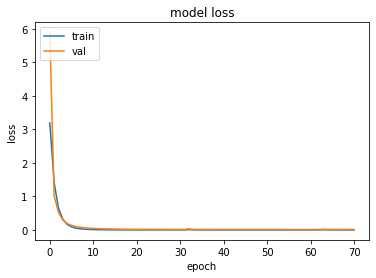

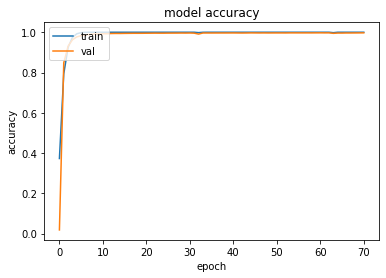

In [17]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [18]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [19]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        img_array = img_array[:, 80:560, :]
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=1)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            #if np.max(Y)>0.95:
                #cv2.imwrite(load_path+'/test_images/'+CATEGORIES[np.argmax(Y)]+str(np.max(Y))+'.jpg',image)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 32ms/step
